<a href="https://colab.research.google.com/github/yonikremer/final_project/blob/master/profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook should be run in colab

In [1]:
%%bash
rm -rf ./final_project
git clone https://github.com/yonikremer/final_project.git
pip install --quiet --requirement /content/final_project/evaluation/evaluation_requirements.txt
pip install --quiet --requirement /content/final_project/project_requirements.txt

Cloning into 'final_project'...


In [2]:
import sys
sys.path.append('/content/final_project');

In [3]:
from final_project.sampling_generator import SamplingGenerator
g = SamplingGenerator(
        model_name="facebook/opt-125m",
        group_size=8,
        temp=1.0,
        top_k=None,
        top_p=1.0,
        end_of_sentence_stop=True,
        answer_length_multiplier=4,
    )
example_prompt = "What do you do when your firmly held beliefs turn out not to be true? When Casey Gerald's religion failed him, he searched for something new to believe in -- in business, in government, in philanthropy -- but found only false saviors. In this moving talk, Gerald urges us all to question our beliefs and embrace uncertainty."

Downloading:   0%|          | 0.00/685 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/651 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/441 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/251M [00:00<?, ?B/s]

In [ ]:
%prun g(example_prompt)

In [10]:
from datetime import datetime
max_group_size = 64
run_times = []
for curr_group_size in range(1, max_group_size):
    g.group_size = curr_group_size
    start_time = datetime.now()
    g(example_prompt)
    curr_time_dif = (datetime.now() - start_time).total_seconds()
    run_times.append(curr_time_dif)

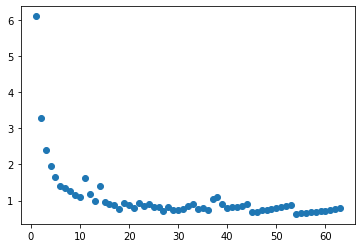

In [12]:
import matplotlib.pyplot as plt
plt.scatter(range(1, max_group_size), run_times)
plt.show()